In [18]:
import sys 
sys.path.append('../src') 

import numpy as np
import matplotlib.pyplot as plt
# import torch

import KPCA
from utils import get_data, calc_energy

In [19]:
kernels = list()
for i in range(3):
    kernels.append(KPCA.KernelPCA())

In [ ]:
Re = 10
beta = .5
Wi = 5
eps = 1
case = 'cavity'
theta = (1.0-beta)/(Re*Wi)
X, X_mean = get_data(Re, Wi, beta, case='cavity_ref', n_data=-2, dir_path='../../npz_data/dataset_cavity')
print(theta)

# Re = 0.01
# beta = .5
# Wi = 5
# eps = 1
# case = 'cavity'
# theta = (1.0-beta)/(Re*Wi)
# X, X_mean = get_data(Re, Wi, beta, case='cavity', n_data=-2, dir_path='../../npz_data')

0.01


In [23]:
def iter_reconstruction(X, theta, degree, modes, kernel:KPCA.KernelPCA, kernel_type='linear'):
    reconstructions = list()
    if not kernel._is_fitted:
        kernel.fit(X, n_components=modes[0], kernel=kernel_type, theta = theta,degree=degree)
    for m in modes:
        kernel.train_R(degree = degree, n_components = m)
        Phi = kernel.transform(X, theta)
        reconstructions.append(kernel.invert_transform(Phi, theta))
    return reconstructions

def iter_error(X, reconstructions):
    errors = list()
    nm_X = np.linalg.norm(X)
    for r in reconstructions:
        errors.append(np.linalg.norm(X - r) / nm_X)
    return errors

In [24]:
degrees = list()
kernel_type = 'linear'
modes = [2,4,8, 16]
kernel_linear = kernels[0]
for i in range(4):
    rec = iter_reconstruction(X.T, theta, degree=i+1, modes = modes, kernel_type=kernel_type, kernel=kernel_linear)
    err = iter_error(X, rec)

    degrees.append(err)

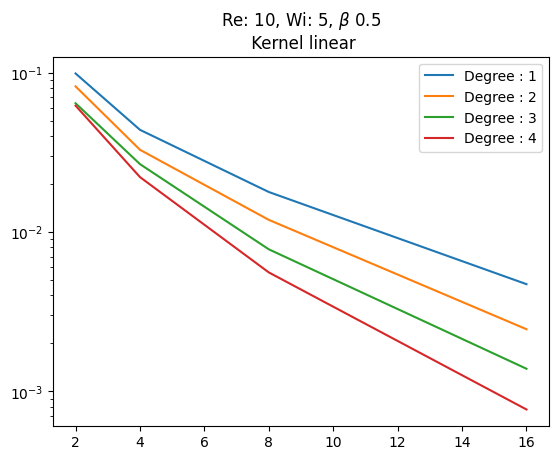

In [25]:
for i, err in enumerate(degrees):
    plt.plot(modes, err, label = f'Degree : {i+1}')

plt.title(f'Re: {Re:g}, Wi: {Wi:g}, $\\beta$ {beta:g}\n Kernel {kernel_type}')
plt.legend()
plt.yscale('log')

In [79]:
# Add noise:
noise_level = 0.2
X_data = X.reshape((-1,5,X.shape[-1]))
mse = (X_data**2).mean(axis=(0,2)).reshape((1,5,1))
noise = (noise_level * mse * np.random.randn(*X_data.shape)).reshape((-1,X_data.shape[-1]))
X_noise = X + noise

In [82]:
degrees = list()
kernel_type = 'linear'
modes = [2,4,8, 16]
kernel_linear = kernels[0]
kernel_linear._is_fitted = False
rec_linear = list()
for i in range(4):
    rec = iter_reconstruction(X_noise.T, theta, degree=1, modes = modes, kernel_type=kernel_type, kernel=kernel_linear)
    rec_linear.append(rec)
    err = iter_error(X, rec)

    degrees.append(err)

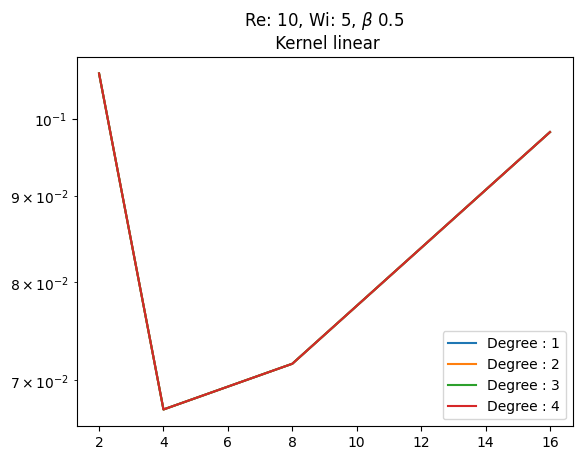

In [83]:
for i, err in enumerate(degrees):
    plt.plot(modes, err, label = f'Degree : {i+1}')

plt.title(f'Re: {Re:g}, Wi: {Wi:g}, $\\beta$ {beta:g}\n Kernel {kernel_type}')
plt.legend()
plt.yscale('log')

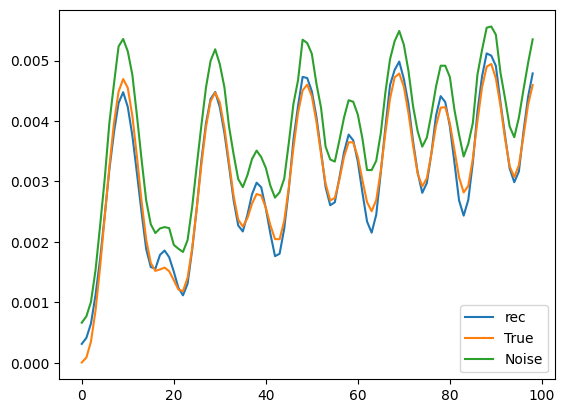

In [29]:
energy_linear,_,_ = calc_energy(rec_linear[0][1], Wi, beta, Re, dx = 0.0125, dy = None)
energy_true,_,_ = calc_energy(X, Wi, beta, Re, dx = 0.0125, dy = None)
energy_noise,_,_ = calc_energy(X_noise, Wi, beta, Re, dx = 0.0125, dy = None)
plt.plot(energy_linear.T, label='rec')
plt.plot(energy_true.T, label='True')
plt.plot(energy_noise.T, label='Noise')

plt.legend()

In [30]:
degrees = list()
kernel_type = 'oldroyd'
modes = [2,4,8, 16]
kernel_oldroyd = kernels[1]
kernel_oldroyd._is_fitted = False
rec_old = list()
for i in range(4):
    rec = iter_reconstruction(X_noise.T, theta, degree=i+1, modes = modes, kernel_type=kernel_type, kernel=kernel_linear)
    rec_old.append(rec)
    err = iter_error(X, rec)

    degrees.append(err)

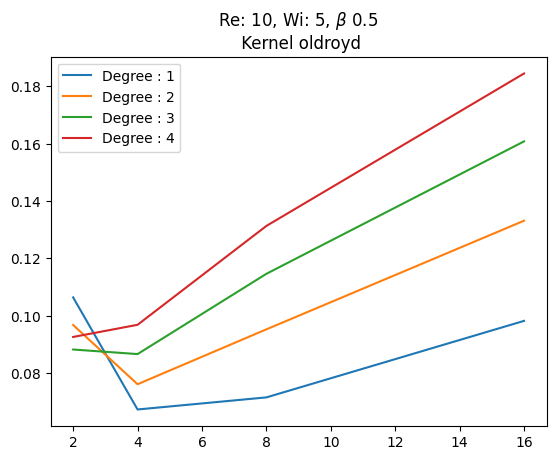

In [31]:
for i, err in enumerate(degrees):
    plt.plot(modes, err, label = f'Degree : {i+1}')

plt.title(f'Re: {Re:g}, Wi: {Wi:g}, $\\beta$ {beta:g}\n Kernel {kernel_type}')
plt.legend()
# plt.yscale('log')

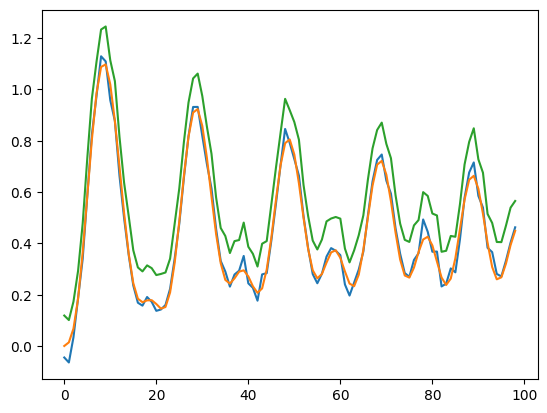

In [63]:
energy_oldroyd,_,_ = calc_energy(rec_old[0][1], Wi, beta, Re, dx = 0.0125, dy = None)
plt.plot(energy_oldroyd.T, label='Oldroyd')
plt.plot(energy_true.T, label='True')
plt.plot(energy_noise.T, label='Noise')


In [56]:
degrees = list()
kernel_type = 'linear'
modes = [2,4,8, 16]
kernel_linear = kernels[0]
kernel_linear._is_fitted = False
rec_linear = list()
X_data = X.reshape((-1,5,X.shape[-1]))
mse = (X_data**2).mean(axis=(0,2)).reshape((1,5,1))
noises = [0, 0.01, 0.05, 0.1, 0.15, 0.2]
for noise_level in range(4):
    noise = (noise_level * mse * np.random.randn(*X_data.shape)).reshape((-1,X_data.shape[-1]))
    X_noise = X + noise
    rec = iter_reconstruction(X_noise.T, theta, degree=1, modes = modes, kernel_type=kernel_type, kernel=kernel_linear)
    rec_linear.append(rec)
    err = iter_error(X, rec)

    degrees.append(err)

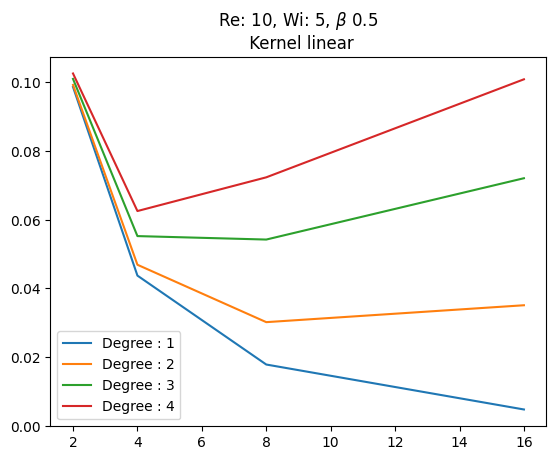

In [57]:
for i, err in enumerate(degrees):
    plt.plot(modes, err, label = f'Degree : {i+1}')

plt.title(f'Re: {Re:g}, Wi: {Wi:g}, $\\beta$ {beta:g}\n Kernel {kernel_type}')
plt.legend()
# plt.yscale('log')

In [126]:
kernel_type = 'oldroyd'
modes = [2,4,8, 16]
X_data = X.reshape((-1,5,X.shape[-1]))
mse = (X_data**2).mean(axis=(0,2)).reshape((1,5,1))

noises = np.linspace(0,0.5,6, np.float32)
# noises = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
# noises = [0.2]
rec_oldroyd = list()
noise_err_oldroyd = []

noise_err_oldroyd.append(err)
for noise_level in noises:
    noise = (noise_level * mse * np.random.randn(*X_data.shape)).reshape((-1,X_data.shape[-1]))
    X_noise = X + noise
    kernel_oldroyd = KPCA.KernelPCA()
    rec = iter_reconstruction(X_noise.T, theta, degree=1, modes = modes, kernel_type=kernel_type, kernel=kernel_oldroyd)
    rec_oldroyd.append(rec)
    err = iter_error(X, rec)

    noise_err_oldroyd.append(err)

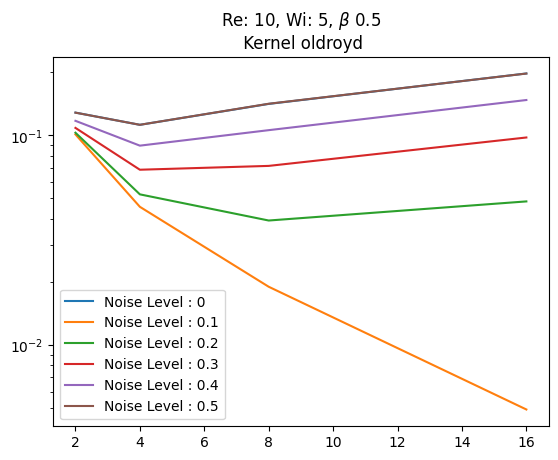

In [125]:
for err, n in zip(noise_err_oldroyd, noises):
    plt.plot(modes, err, label = f'Noise Level : {n:g}')

plt.title(f'Re: {Re:g}, Wi: {Wi:g}, $\\beta$ {beta:g}\n Kernel {kernel_type}')
plt.legend()
plt.yscale('log')

In [13]:
# PCA(X + N)   =   PCA(X) + PCA(N)
# KPCA(X + N) =/= KPCA(X) + KPCA(N)

kernel_noise_lin = KPCA.KernelPCA()
kernel_lin = KPCA.KernelPCA()

kernel_noise_lin.fit(noise.T, n_components=2, kernel='linear', theta = theta,degree=1)
kernel_lin.fit(X.T, n_components=2, kernel='linear', theta = theta,degree=1)


kernel_noise_old = KPCA.KernelPCA()
kernel_old = KPCA.KernelPCA()

kernel_noise_old.fit(noise.T, n_components=2, kernel='oldroyd', theta = theta,degree=1)
kernel_old.fit(X.T, n_components=2, kernel='oldroyd', theta = theta,degree=1)

kernel_noise_poly = KPCA.KernelPCA()
kernel_poly = KPCA.KernelPCA()

kernel_noise_poly.fit(noise.T, n_components=2, kernel='poly', theta = theta,degree=1, eps = 3)
kernel_poly.fit(X.T, n_components=2, kernel='poly', theta = theta,degree=1, eps = 3)


In [14]:
energy_noise_lin = np.cumsum(kernel_noise_lin.eigenvalues) / np.sum(kernel_noise_lin.eigenvalues)
energy_noise_old = np.cumsum(kernel_noise_old.eigenvalues) / np.sum(kernel_noise_old.eigenvalues)
energy_noise_poly = np.cumsum(kernel_noise_poly.eigenvalues) / np.sum(kernel_noise_poly.eigenvalues)
energy_lin = np.cumsum(kernel_lin.eigenvalues) / np.sum(kernel_lin.eigenvalues)
energy_old = np.cumsum(kernel_old.eigenvalues) / np.sum(kernel_old.eigenvalues)
energy_poly = np.cumsum(kernel_poly.eigenvalues) / np.sum(kernel_poly.eigenvalues)

In [41]:
X.shape, noise.shape, kernel_noise_lin.eigenvalues.shape

((32000, 99), (32000, 99), (99,))

In [51]:
thetas = [i for i in [0., 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]]
print(thetas)
kernel_noise_old = KPCA.KernelPCA()

energies = []
for t in thetas:
    print(t)
    kernel_noise_old.fit(noise.T, n_components=2, kernel='ptt', theta = 1,degree=1, eps=0.4)
    energy_noise_old = np.cumsum(kernel_noise_old.eigenvalues) / np.sum(kernel_noise_old.eigenvalues)
    energies.append(energy_noise_old)

[0.0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
0.0
0.01
0.1
0.2
0.3
0.4
0.5
0.6
0.7


Text(0.5, 1.0, 'Oldroyd Kernel for Noise')

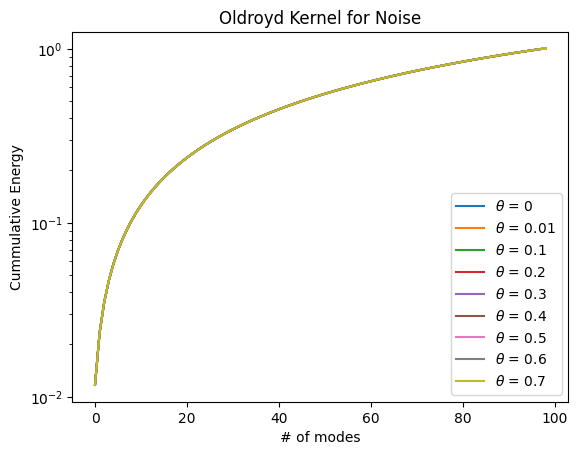

In [52]:
lim = 100
for t,e in zip(thetas, energies):
    plt.plot(e[:lim], label=f'$\\theta$ = {t:g}')
plt.yscale('log')
plt.legend()

plt.xlabel('# of modes')
plt.ylabel('Cummulative Energy')
plt.title('Oldroyd Kernel for Noise')

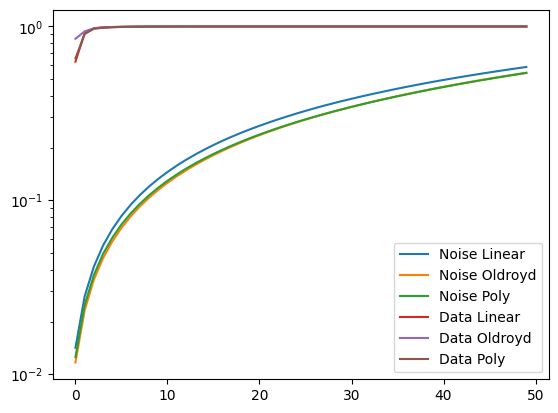

In [200]:
lim = 50
plt.plot(energy_noise_lin[:lim], label='Noise Linear')
plt.plot(energy_noise_old[:lim], label='Noise Oldroyd')
plt.plot(energy_noise_poly[:lim], label='Noise Poly')
plt.plot(energy_lin[:lim], label='Data Linear')
plt.plot(energy_old[:lim], label='Data Oldroyd')
plt.plot(energy_poly[:lim], label='Data Poly')

plt.yscale('log')
plt.legend()

In [212]:
def test_rec(kernel_type, data_noise, data_clean, n_modes, Wi, beta, Re):
    theta = (1.0-beta)/(Re*Wi)
    kernel = KPCA.KernelPCA()
    kernel.fit(data_noise.T, n_components=n_modes, kernel=kernel_type, theta = theta,degree=1)
    Phi = kernel.transform(data_noise.T, theta)
    rec = kernel.invert_transform(Phi, theta)

    nm_X = np.linalg.norm(data_clean)
    rec_err = np.linalg.norm(data_clean - rec) / nm_X

    nrg_clean, _, _ = calc_energy(data_clean, Wi, beta, Re, dx = 0.0125, dy = None)
    nrg_rec, _, _ = calc_energy(rec, Wi, beta, Re, dx = 0.0125, dy = None)

    nrg_err = np.abs(nrg_clean - nrg_rec).sum() / nrg_clean.sum()
    return rec_err, nrg_err

def test_rec2(kernel_type, data_noise, data_clean, n_modes, Wi, beta, Re):
    theta = (1.0-beta)/(Re*Wi)
    kernel = KPCA.KernelPCA()
    kernel.fit(data_clean.T, n_components=n_modes, kernel=kernel_type, theta = theta,degree=1)
    Phi = kernel.transform(data_noise.T, theta)
    rec = kernel.invert_transform(Phi, theta)

    nm_X = np.linalg.norm(data_clean)
    rec_err = np.linalg.norm(data_clean - rec) / nm_X

    nrg_clean, _, _ = calc_energy(data_clean, Wi, beta, Re, dx = 0.0125, dy = None)
    nrg_rec, _, _ = calc_energy(rec, Wi, beta, Re, dx = 0.0125, dy = None)

    nrg_err = np.abs(nrg_clean - nrg_rec).sum() / nrg_clean.sum()
    return rec_err, nrg_err

In [176]:
# theta = 0.01
Re = 10
beta = .5
Wi = 5

# # theta = 100
# Re = 0.01
# beta = .5
# Wi = .5

eps = 1
case = 'cavity'
theta = (1.0-beta)/(Re*Wi)
X, X_mean = get_data(Re, Wi, beta, case='cavity_ref', n_data=99, dir_path='../../npz_data/dataset_cavity')
print(theta)

X_data = X.reshape(-1,5,X.shape[-1])
mse = np.mean(X**2)

0.01


In [216]:
n_modes = 4
noise_levels = np.linspace(0,0.2,5)
print(noise_levels)
err_rec_lin = []
err_rec_old = []

err_nrg_lin = []
err_nrg_old = []

for nl in noise_levels:
    noise = (nl * mse * np.random.randn(*X_data.shape)).reshape((-1,X_data.shape[-1]))
    X_noise = X + noise

    rec_lin, nrg_lin = test_rec('linear', data_noise=X_noise, data_clean=X, n_modes=n_modes, Re=Re, Wi=Wi, beta=beta)
    rec_old, nrg_old = test_rec('oldroyd', data_noise=X_noise, data_clean=X, n_modes=n_modes, Re=Re, Wi=Wi, beta=beta)

    err_rec_lin.append(rec_lin)
    err_rec_old.append(rec_old)

    err_nrg_lin.append(nrg_lin)
    err_nrg_old.append(nrg_old)

[0.   0.05 0.1  0.15 0.2 ]


Text(0.5, 0.98, 'Noise Removal using KPCA\n(4 modes - $\\theta$ = 0.01)')

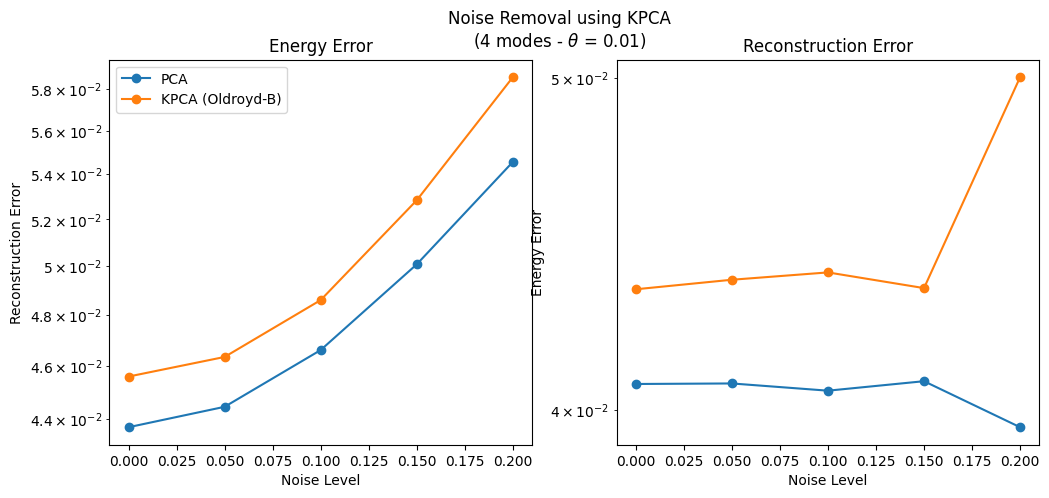

In [221]:
f, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(noise_levels, err_rec_lin,'o-', label='PCA')
ax[0].plot(noise_levels, err_rec_old,'o-', label='KPCA (Oldroyd-B)')

ax[0].legend()
ax[0].set_yscale('log')
ax[0].set_xlabel('Noise Level')
ax[0].set_ylabel('Reconstruction Error')

ax[1].plot(noise_levels, err_nrg_lin,'o-', label='PCA')
ax[1].plot(noise_levels, err_nrg_old,'o-', label='KPCA (Oldroyd-B)')

# ax[1].legend()
ax[1].set_yscale('log')
ax[1].set_xlabel('Noise Level')
ax[1].set_ylabel('Energy Error')

ax[1].set_title(f'Reconstruction Error')
ax[0].set_title(f'Energy Error')

f.suptitle(f'Noise Removal using KPCA\n({n_modes} modes - $\\theta$ = {theta:g})')

Text(0.5, 1.0, 'Noise Removal using KPCA\n(4 modes - $\\theta$ = 0.01)')

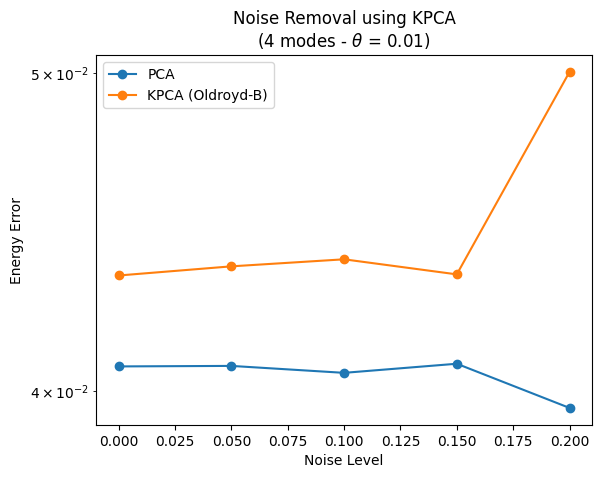

In [218]:
plt.plot(noise_levels, err_nrg_lin,'o-', label='PCA')
plt.plot(noise_levels, err_nrg_old,'o-', label='KPCA (Oldroyd-B)')

plt.legend()
plt.yscale('log')
plt.xlabel('Noise Level')
plt.ylabel('Energy Error')

plt.title(f'Noise Removal using KPCA\n({n_modes} modes - $\\theta$ = {theta:g})')